In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data = df.where((pd.notnull(df)), ' ')

In [5]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.shape
#rows = 5572 anmnd columns = 2

(5572, 2)

In [8]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham' ,'Category',] = 1

In [9]:
X = data['Message']
Y = data['Category']

In [10]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [11]:
print(Y)


0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [12]:
from sklearn.model_selection import train_test_split

# Assuming you have defined your X and Y variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [13]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [14]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [16]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [17]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [19]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [20]:
from sklearn.metrics import accuracy_score
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [21]:
print('Acc on training data : ', accuracy_on_training_data)

Acc on training data :  0.9670181736594121


In [22]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data_logistic_regression = accuracy_score(Y_test, prediction_on_test_data)

In [23]:
print('acc on test data : ', accuracy_on_test_data_logistic_regression)

acc on test data :  0.9659192825112107


In [24]:
input_your_mail = ["This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)
if(prediction[0]==1):
    print('not a spam mail')
else:
    print('Spam mail')

[0]
Spam mail


In [25]:
input_your_mail = ["The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)
if(prediction[0]==1):
    print('not a spam mail')
else:
    print('Spam mail')

[1]
not a spam mail


#with 96% accuracy with training and testing data

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [27]:
df = pd.read_csv('mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
data = df.fillna(' ')


In [29]:
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])

In [30]:
X = data['Message']
Y = data['Category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [31]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [32]:
#model training
model = DecisionTreeClassifier()
model.fit(X_train_features, Y_train)

DecisionTreeClassifier()

In [33]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data:', accuracy_on_training_data)

Accuracy on training data: 1.0


In [34]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data_decision_tree = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data:', accuracy_on_test_data_decision_tree)

Accuracy on test data: 0.9659192825112107


In [35]:
input_mails = [
    "This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",
    "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
]
input_data_features = feature_extraction.transform(input_mails)
predictions = model.predict(input_data_features)

for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f'Prediction for input {i+1}: not a spam mail')
    else:
        print(f'Prediction for input {i+1}: Spam mail')

Prediction for input 1: not a spam mail
Prediction for input 2: Spam mail


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [37]:
df = pd.read_csv('mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
data = df.fillna(' ')

In [39]:
data['Category'] = LabelEncoder().fit_transform(data['Category'])

In [40]:
X = data['Message']
Y = data['Category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [41]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [42]:
#training model
model = RandomForestClassifier()
model.fit(X_train_features, Y_train)

RandomForestClassifier()

In [43]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data:', accuracy_on_training_data)

Accuracy on training data: 1.0


In [44]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data_random_forest = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data:', accuracy_on_test_data_random_forest)

Accuracy on test data: 0.9766816143497757


In [45]:
input_mails = [
    "This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",
    "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
]
input_data_features = feature_extraction.transform(input_mails)
predictions = model.predict(input_data_features)

for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f'Prediction for input {i+1}: not a spam mail')
    else:
        print(f'Prediction for input {i+1}: Spam mail')

Prediction for input 1: not a spam mail
Prediction for input 2: Spam mail


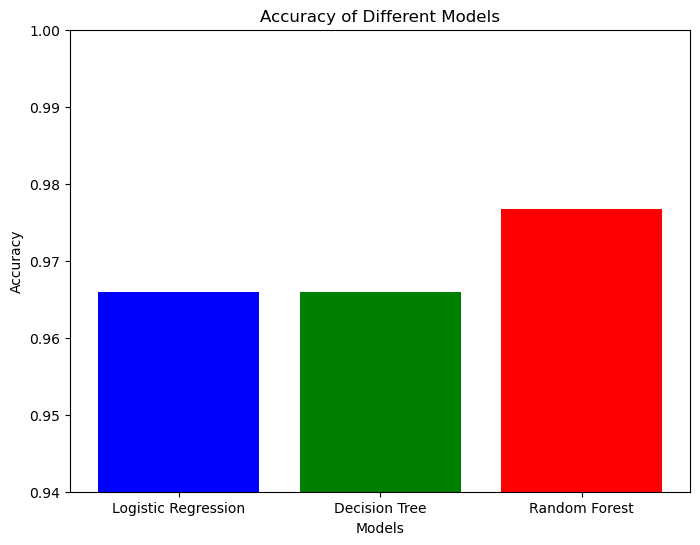

In [46]:
import matplotlib.pyplot as plt

# Accuracy scores dictionary
accuracy_scores = {
    'Logistic Regression': accuracy_on_test_data_logistic_regression,
    'Decision Tree': accuracy_on_test_data_decision_tree,
    'Random Forest': accuracy_on_test_data_random_forest
}

# Plot the accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.94, 1.0)  # Set y-axis limit between 0.94 and 0.97
plt.show()
